In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
# create value labels automatically on the chart graph
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            ax.annotate(
                f"{height:.0f}%", 
                xy=(rect.get_x() + rect.get_width() / 2, rect.get_y()),
                xytext=(0, 0), 
                textcoords="offset points", 
                ha='center', 
                va='bottom', 
                fontsize=16, 
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.9))

In [28]:
# variables
path_excel = r'data.xlsx'
file_path = r'images/Figure9 serwer_treatment_cost.pdf'
dpi=700

piechart_sewer_sheetname = r'E&T_total'
piechart_sewer_title = 'a) TACH breakdown by cost category\n in conventional separate sewers with no pumping'

barchart_sewer_sheetname = 'E&T_detail'
barchart_sewer_title = 'b) TACH breakdown by cost voice for major cost categories\n in conventional separate sewers with no pumping'
barchart_sewer_xlabel = 'Cost category'
barchart_sewer_ylabel = 'Proportion of Total Annualised Cost per Household (TACH)'

piechart_treatment_sheetname = 'treatment_total'
piechart_treatment_title = 'c) TACH breakdown by cost category\n in Limanet Wastewater treatment plant'

barchart_treatment_sheetname = 'treatment_detail'
barchart_treatment_title = 'd) TACH breakdown by cost voice for major cost categories\n in Limanet Wastewater treatment plant'
barchart_treatment_xlabel = 'Cost category'
barchart_treatment_ylabel = 'Proportion of Total Annualised Cost per Household (TACH)'

plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = 14

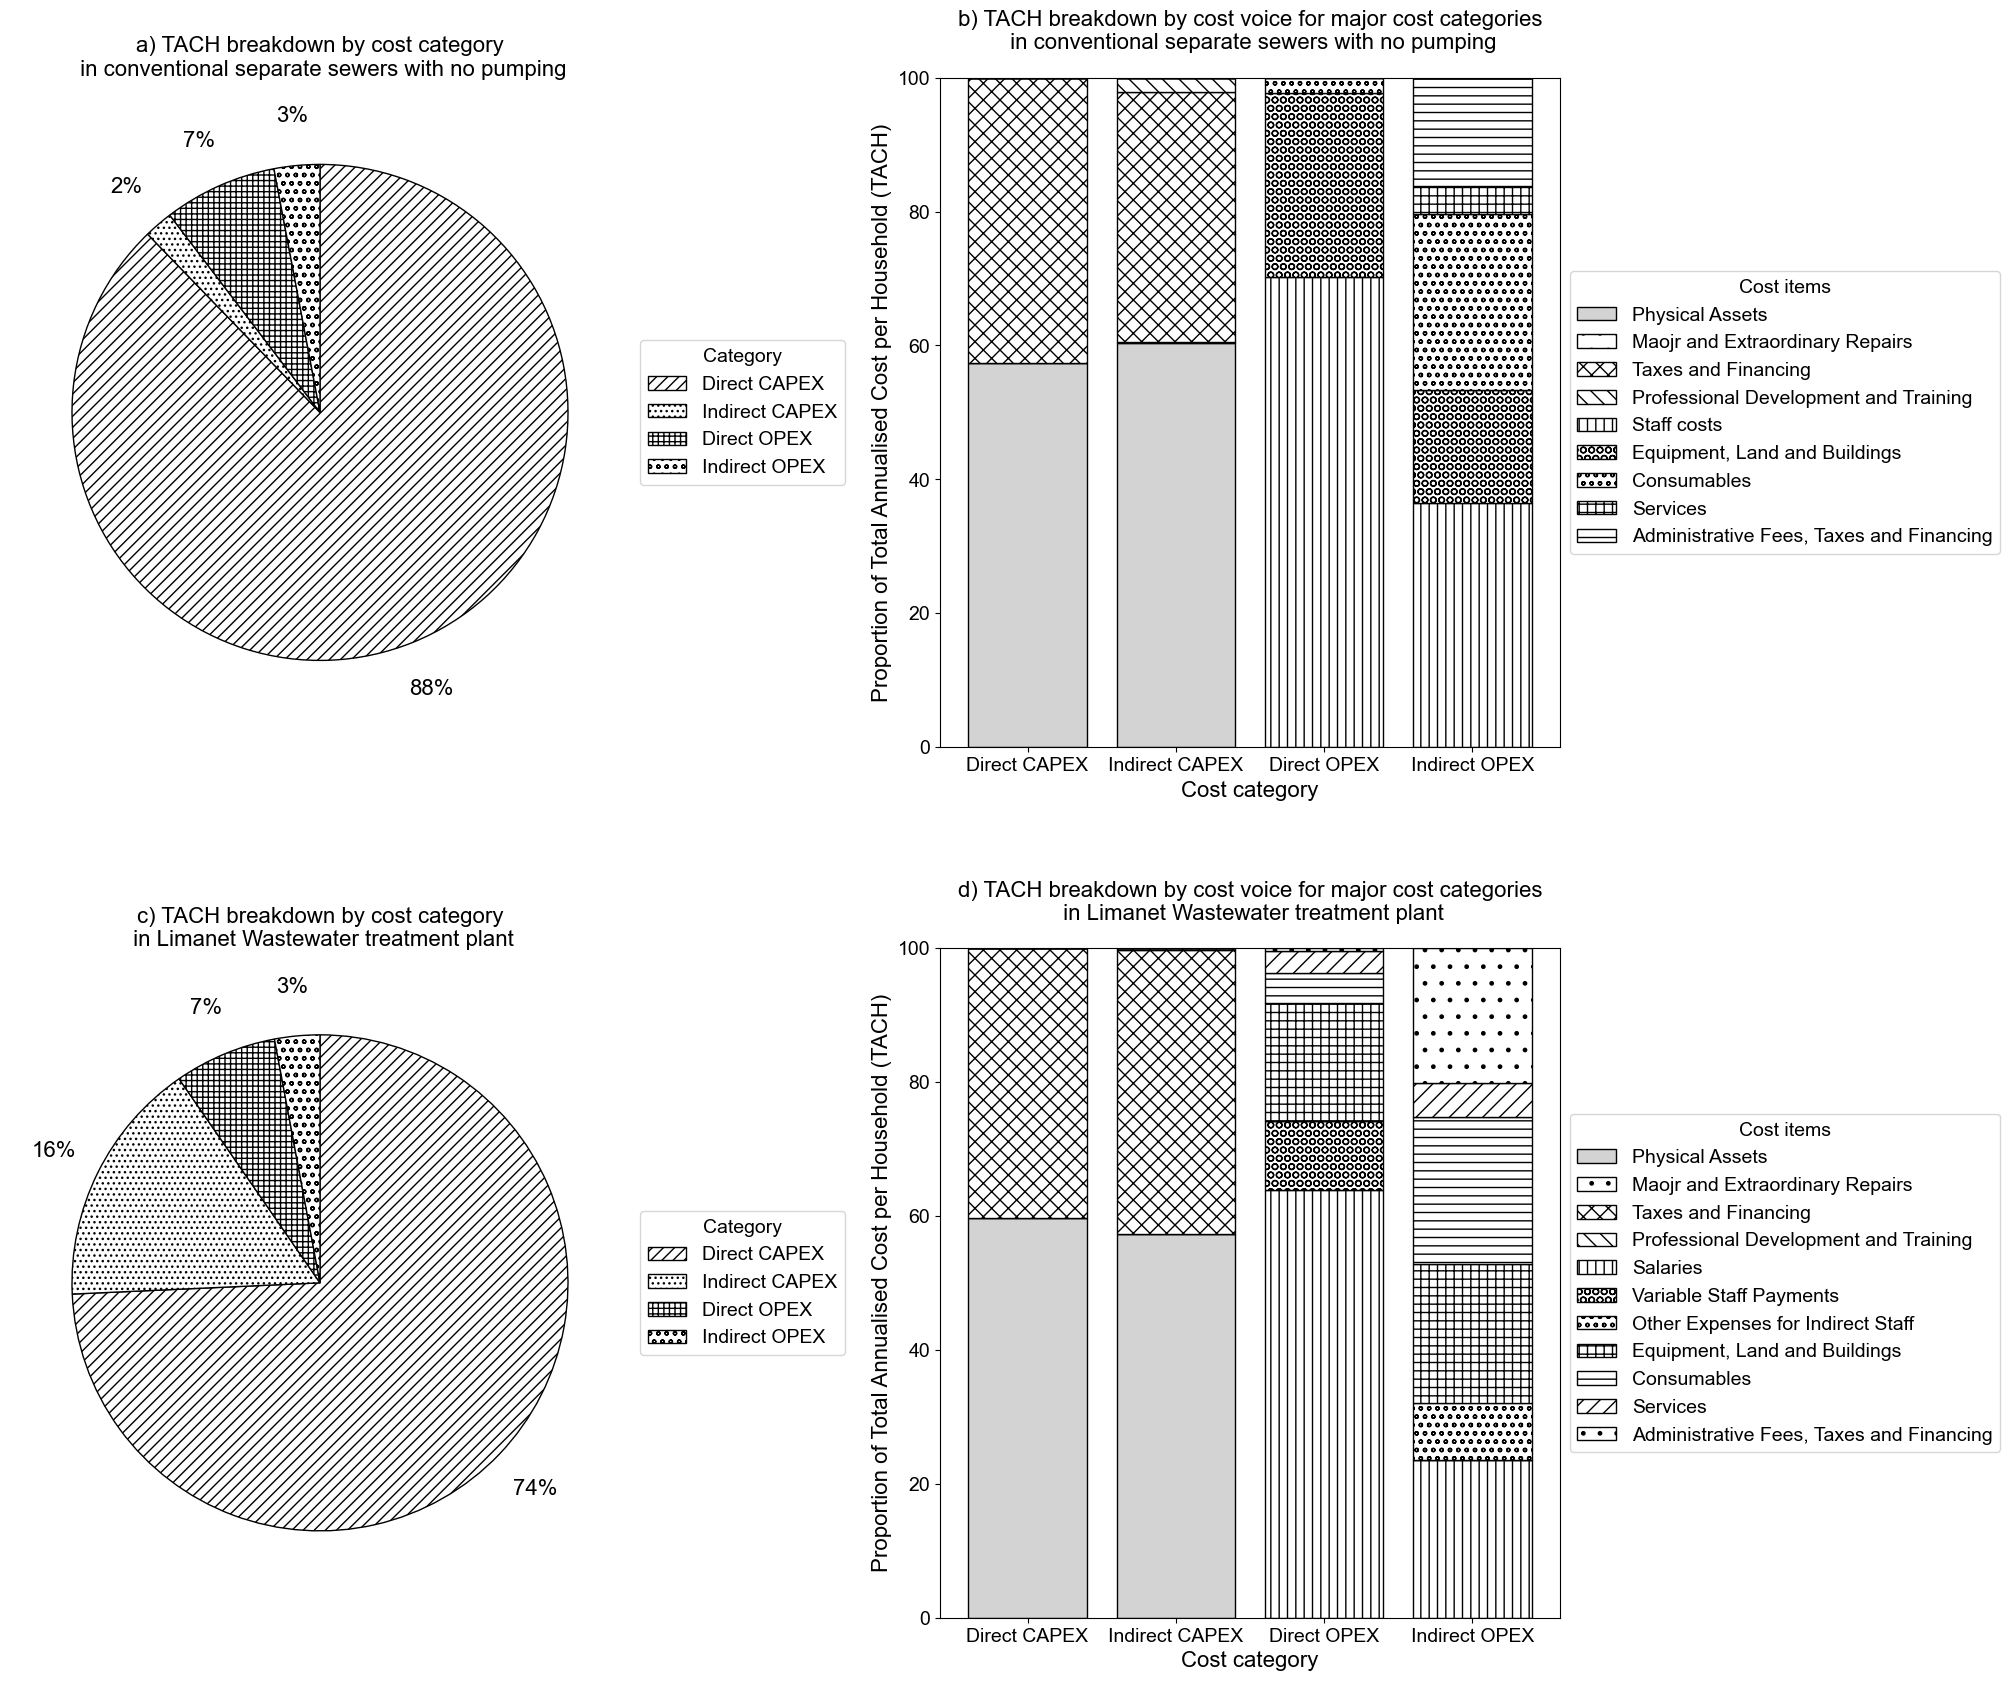

In [30]:
fig = plt.figure(figsize=(20, 20))

## Sewer piechart

ax1 = fig.add_subplot(2, 2, 1)

df = pd.read_excel(path_excel, sheet_name=piechart_sewer_sheetname)

wedges, labels, _ = ax1.pie(
    df['TACH'], 
    colors='w',
    autopct='%.0f%%', 
    pctdistance=1.2, 
    startangle=90, 
    counterclock=False,
    wedgeprops={'linewidth': 1, 'edgecolor':"k"},
    textprops={'fontsize': 16})

hatches = ['///', '...', '+++', 'oo']
for i, wedge in enumerate(wedges):
    wedge.set_hatch(hatches[i % len(hatches)])

ax1.set_title(piechart_sewer_title, loc='center', x=0.5, y=1.03, fontsize=16)
ax1.legend(wedges, df['Category'], title='Category', loc='center left', bbox_to_anchor=(1, 0.5), prop={"size":14})

## Sewer barchart

ax2 = fig.add_subplot(2, 2, 2)

df = pd.read_excel(path_excel, sheet_name=barchart_sewer_sheetname)

row_sums = df.sum(axis=1, numeric_only=True)
for i, row in df.iterrows():
    for j, column in enumerate(df.loc[i][1:]):
        percent = (column / row_sums[i]) * 100
        df.loc[i, df.columns[j + 1]] = percent
        
bottom = None
hatches = ['//', '.', 'xx', '\\\\', '||', 'OO', 'oo', '++', '--'] 
for i, column in enumerate(df.columns[1:]):
    if column == 'Physical Assets':
        bar = ax2.bar(df.iloc[:, 0], df[column], color='#d3d3d3', edgecolor='k', label=column)
    else:
        bar = ax2.bar(df.iloc[:, 0], df[column], color='w', edgecolor='k', bottom=bottom, label=column, hatch=hatches[i % len(hatches)])
#     autolabel(bar, ax2)
    bottom = df[column] if bottom is None else bottom + df[column]

ax2.set_title(barchart_sewer_title, loc='center', x=0.5, y=1.03, fontsize=16)
ax2.set_xlabel(barchart_sewer_xlabel, fontsize=16)
ax2.set_ylabel(barchart_sewer_ylabel, fontsize=16)

ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={"size":14}, title="Cost items")

## treatment piechart

ax3 = fig.add_subplot(2, 2, 3)

df = pd.read_excel(path_excel, sheet_name=piechart_treatment_sheetname)

wedges, labels, _ = ax3.pie(
    df['TACH'], 
    colors='w',
    autopct='%.0f%%', 
    pctdistance=1.2, 
    startangle=90, 
    counterclock=False,
    wedgeprops={'linewidth': 1, 'edgecolor':"k"},
    textprops={'fontsize': 16})

hatches = ['///', '...', '+++', 'oo']
for i, wedge in enumerate(wedges):
    wedge.set_hatch(hatches[i % len(hatches)])

ax3.set_title(piechart_treatment_title, loc='center', x=0.5, y=1.03, fontsize=16)
ax3.legend(wedges, df['Category'], title='Category', loc='center left', bbox_to_anchor=(1, 0.5), prop={"size":14})

## treatment barchart

ax4 = fig.add_subplot(2, 2, 4)

df = pd.read_excel(path_excel, sheet_name=barchart_treatment_sheetname)

row_sums = df.sum(axis=1, numeric_only=True)
for i, row in df.iterrows():
    for j, column in enumerate(df.loc[i][1:]):
        percent = (column / row_sums[i]) * 100
        df.loc[i, df.columns[j + 1]] = percent
        
bottom = None
hatches = ['//', '.', 'xx', '\\\\', '||', 'OO', 'oo', '++', '--'] 
for i, column in enumerate(df.columns[1:]):
    if column == 'Physical Assets':
        bar = ax4.bar(df.iloc[:, 0], df[column], color='#d3d3d3', edgecolor='k', label=column)
    else:
        bar = ax4.bar(df.iloc[:, 0], df[column], color='w', edgecolor='k', bottom=bottom, label=column, hatch=hatches[i % len(hatches)])
#     autolabel(bar, ax2)
    bottom = df[column] if bottom is None else bottom + df[column]

ax4.set_title(barchart_treatment_title, loc='center', x=0.5, y=1.03, fontsize=16)
ax4.set_xlabel(barchart_treatment_xlabel, fontsize=16)
ax4.set_ylabel(barchart_treatment_ylabel, fontsize=16)

ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={"size":14}, title="Cost items")

plt.subplots_adjust(wspace=0.5, hspace=0.3)
plt.savefig(file_path, format="pdf", dpi=dpi, transparent=True, bbox_inches='tight')
plt.savefig(f"{file_path}.png", format="png", dpi=dpi, transparent=True, bbox_inches='tight')
plt.show()